<img src="images/usm.png" width="480" height="240" align="center"/>


<center>
    <strong> <font size="5"> MAT215 - 1° Semestre 2020 <br> Matemática Discreta</font> </strong>
    
</center>


## Índice
* [Instrucciones](#in)
* [Códigos correctores de errores](#p1)
* [Ápendice](#ap)

<a id='in'></a>
## 1.- Instrucciones.

* Este laboratorio es de carácter individual, aunque se permite el intercambio de ideas con demás estudiantes, la redacción de éste debe ser personal.
* La fecha de entrega es el 30/06/20 con hora límite 23:59 al correo nicolas.alfaro@sansano.usm.cl Por día habrá un descuento de 10 ptos, al segundo día 20 ptos hasta el 5to día de atraso fecha a la cuál ya no se recibirán mas laboratorios.
* El lenguaje de programación utilizado para resolver el laboratorio es de libre elección, Siéntase libre de utilizar cualquier librería que lo ayude en su programación (Guardando parámetros, evitar utilizar artillería pesada). Eso sí considere que la resolución del laboratorio se hizo pensando en el lenguaje Python, usar otro lenguaje podría incurrir en variaciones en la dificultad de cada pregunta.

In [2]:
%%html
<style>
figcaption {
    margin: 10px 0 0 0;
    font-variant: small-caps;
    font-family: Verdana;
    font-weight: bold;
    text-align: center
}
</style>


<a id='p1'></a>

## 2.- Códigos correctores de errores(100p)

El uso de códigos correctores (y detectores) de errores es una rama que ha sido empleada en una amplia gama de campos, principalmente la electrónica y telecomunicaciones, ya que, debido a la naturaleza de la tecnología usada, ésta es muy vulnerable a sufrir alteraciones a la hora de transmitir la información y dado que en ámbitos científicos o informáticos la corrupción de la información es intolerable, cabe la necesidad de tener un mecanismo que permita restaurar la información. El propósito de este laboratorio es poder ver una de las tantas aplicaciones de los códigos correctores: __Fotografías espaciales__.

<br>

### Voyager 1


En 1977 fue lanzada al espacio la sonda espacial <a href="https://en.wikipedia.org/wiki/Voyager_1">Voyager 1</a>, esta sonda fue enviada con múltiples propósitos, uno de estos era el de obtener imágenes de cuerpos celestes, en particular, uno de sus primeros usos correspondió al retrato del planeta Júpiter.

<br>

<figure>
    <img src="images/Voyager1-jupyter.gif" width="350" align="center">
    <figcaption>Time-lapse de Júpiter (60 días) capturado por la sonda Voyager 1 </figcaption>
</figure>

<br>

Sin embargo los científicos de la NASA de aquel período tuvieron que enfrentarse a un gran problema: Interferencia electromagnética. La sonda, ya que se encontraría, en el espacio exterior, estaría sujeta a la interacción con campos electromagnéticos externos (como por ejemplo, aquel producido por el Sol), estos campos al hacer interferencia con las señales emitidas, generarían perturbaciones en aquellas señales (donde estas perturbaciones se manifiestan como secuencias binarias alteradas). La consecuencia de que esto ocurriese, es que las fotografías sufrirían una pérdida de calidad. Debido a esto los científicos decidieron emplear alguna técnica correctiva. Finalmente, la técnica por la cual se decantaron fue el uso de un código corrector!.

### ¿Cómo transmiten la información las sondas?

 Las sondas se comunican mediante señales electromagnéticas, las cuales son recibidas por un receptor terrestre muy conocido llamado antena, la antena realiza el proceso inverso e interpreta estas señales mediante pulsaciones eléctricas, las cuales se transforman en una secuencia binaria. (La gran mayoría de los dispositivos electrónicos funcionan así), en esta secuencia se encuentra lo necesario para recuperar la información (que para este caso sería una fotografía). 
 
<br>

<figure>
    <img src="images/Trans1.jpg" width="400" align="center">
    <figcaption>Representación gráfica de la transmisión entre sonda y receptor </figcaption>
</figure>

<br>

Un posible ejemplo de corrupción del mensaje puede ser el que sigue


```Python
Mensaje enviado="19 17 24"
Mensaje enviado en binario="1011 1001 1100"
             
~~~~~~~~Interferencia~~~~~~~~~~~

Mensaje recibido en binario="1001 1001 1100"
Mensaje recibido="17 17 24"
```
### ¿Cómo se corrigen los mensajes?

La forma más sencilla para la correción de mensajes es hacer uso del código de repetición. Esta técnica consiste simplemente en enviar varias copias de un mismo mensaje, disminuyendo así la probabilidad de que el mensaje sea corrompido, debido, a que hay menos probabilidad de que un segmento del mensaje sea corrompido $n$ veces en comparación a 1 vez. Usando el mismo ejemplo anterior

```Python
Mensaje enviado 1="19 17 24"
Mensaje enviado 2="19 17 24"
Mensaje enviado 3="19 17 24"
Mensaje enviado 1 en binario="1011 1001 1100"
Mensaje enviado 2 en binario="1011 1001 1100"
Mensaje enviado 3 en binario="1011 1001 1100"
             
~~~~~~~~Interferencia~~~~~~~~~~~

Mensaje recibido 1 en binario="1001 1001 1100"
Mensaje recibido 2 en binario="1011 1001 1100"
Mensaje recibido 3 en binario="1011 1001 1100"
Mensaje recibido 1 ="17 17 24"
Mensaje recibido 2 ="19 17 24"
Mensaje recibido 3 ="19 17 24"
```
Y por lo tanto se tiene que el mensaje original enviado es "19 17 24".

Observación: El código de repetición corrige asumiendo una minimalidad del error, en el mismo mensaje anterior puede haber ocurrido que el mensaje recibido 1, era realmente el mensaje enviado y tanto 2 como 3 eran mensajes corruptos. Sin embargo considere siempre una corrección, asumiendo que los errores ocurren en menor cantidad.

<br>

## Problema

Usted es un científico de renombre perteneciente a la NASA, al cual se le ha encargado la importante misión de supervisar y asegurar una buena calidad en las fotografías tomadas por el Voyager1!, usted de forma sensata sugiere que se destinen recursos a implementar un respaldo para las fotografías basado en un código de repetición de largo 3 (es decir enviar 3 veces el mismo mensaje), argumentando, que existe la posibilidad de que las fotografías sufran alguna corrupción. Sus superiores aceptan con recelo la petición. 
    Unos días después usted recibe la información en archivos csv, __"Saturno-1", "Saturno-2"__ y __"Saturno-3"__ matrices de 500x500 que contienen la información del tono de cada pixel en escala gris (0-255, donde 0 es completamente negro y 255 es completamente blanco).Lamentablemente usted verifica que, efectivamente, las fotografías han sufrido una distorsión de la calidad. En vista de la medida de respaldo usada, usted se dispone a corregir la información recibida.


### Caso Python: Algunas funciones de útilidad PIL y NumPy:


En el caso de que haya escogido usar Python se adjuntan algunas funciones que pueden resultarle de utilidad de las librerías PIL y NumPy:



* __genfromtxt__: Recupera la información del csv a un ndarray

In [4]:
#Se va a recuperar la información de los archivos csv mediante genfromtxt:
import numpy as np
from numpy import genfromtxt

#Primera imagen
Matriz_saturno1 = genfromtxt('Saturno-1.csv', delimiter=',')
Matriz_saturno1 =(Matriz_saturno1 * 1).astype(np.uint8)

#Segunda imagen
Matriz_saturno2 = genfromtxt('Saturno-2.csv', delimiter=',')
Matriz_saturno2 =(Matriz_saturno2 * 1).astype(np.uint8)

#Tercera imagen
Matriz_saturno3 = genfromtxt('Saturno-3.csv', delimiter=',')
Matriz_saturno3 =(Matriz_saturno3 * 1).astype(np.uint8)


* __Image.fromarray__: Compila la imagen contenida en un ndarray.

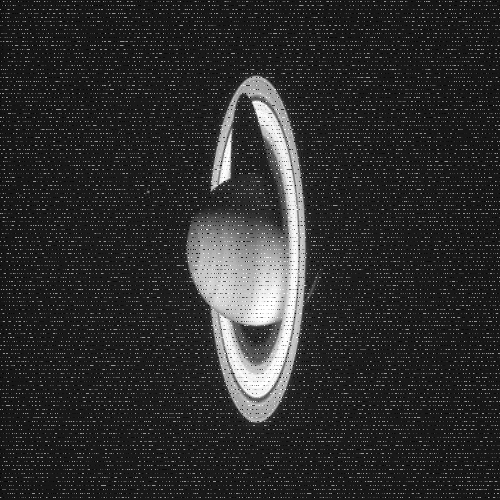

[[ 17  18  19 ...  22  22  22]
 [  1  26  18 ...  54  30  23]
 [ 17  18  19 ...  22  22  22]
 ...
 [148  52  21 ...  54  30  55]
 [ 20  20  20 ...  22  22  23]
 [ 20  20  20 ...  22  22  23]]


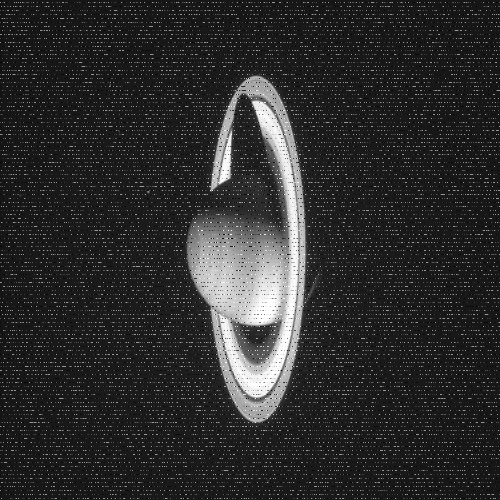

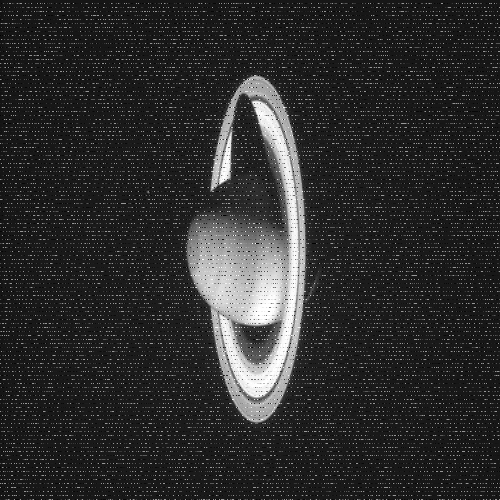

In [6]:
#De lo anterior, ya se tiene en las variables Matriz_saturno las ndarray, vamos a compilar las imagenes
from PIL import Image

display(Image.fromarray(Matriz_saturno1))
print(Matriz_saturno1)
display(Image.fromarray(Matriz_saturno2))
display(Image.fromarray(Matriz_saturno3))

# PREGUNTAS

a) Construya una función que transforme un número entero entre 0-255 (un tono de color) a número binario. De la misma manera, construya una función que transforme un número binario a un número.

b) Construya una función que transforme una matriz (ndarray) de numeros en binario, a un matriz de array en base 10. De forma análoga, construya una función que transforme una matriz (ndarray) de números en base 10 a binario.

_Esta pregunta está sujeta a la estructura donde usted almacene la información del csv, en este caso se asume que se ha usado un ndarray específicamente un arreglo 2-dimensional de numpy (una matriz). Si uso otra estructura la pregunta se reformula a transformar esa estructura de números en binario a una de números en base 10._

c) Construya una función que corrija una secuencia binaria mediante código de repetición. Generalice a una función que corrija una matriz.

_Nuevamente la matriz debe ser reemplazada por la estructura usada en el caso de que no aplique la matriz a su situación particular._

d) Corrija la imagen y obtenga la fotografía original en alta resolución. ¿Aproximadamente cuántos cuerpos celestes observa?

_Se recomienda limpiar la pantalla donde se visualiza la imagen y observar detalladamente!_

e) En la realidad el código corrector de errores utilizado en la misión, fue el código de <a href="https://en.wikipedia.org/wiki/Binary_Golay_code"> Golay </a>   ($\mathcal{G}_{24}$) de parámetros [[24,12,8]](#fh). ¿Por qué se utilizó este código respecto al de repetición? Piense que el ancho de banda de la sonda al encontrarse en el espacio exterior era relativamente bajo.¿Que puede opinar de la capacidad correctiva de ambos códigos?

_Hint: Piense en lo siguiente en un conjunto de 30000 bits enviados. Cuanta es la información relevante en Golay y el de repetición?._

<a id='ap'></a>
# 3.- Apéndice 

<a id='fh'>Parámetros de un código $[n,m,d]$ </a>: Que un código tenga parámetros $[n,m,d]$. Significa que este código interactúa en bloques de información de largo $n$. El parámetro $m$ hace referencia a cuantos carácteres puede tener el mensaje en cuestión, la cantidad $n-m=r$ se llama redundancia y hace referencia a la cantidad de carácteres que no corresponden al mensaje, si no, a carácteres cuya finalidad es corregir los otros $m$ carácteres. El parámetro $d$ corresponde a la mínima distancia posible entre 2 bloques válidos del código.
    La distancia $d(x)$ usada es la llamada __Distancia de Hamming__ que está definida como sigue:

<br>

Sean $M_{1}={x_{1}x_{2}\dots x_{n}}$, $M_{2}={y_{1}y_{2}\dots y_{n}}$ bloques de carácteres.

$$d(M_{1},M_{2})= |i \in \{1,2,\dots,n\} \ / \ x_{i}\neq y_{i}|$$

Es decir, la cantidad de posiciones en la cual los mensajes tienen carácteres diferentes:

Ej:$d(1101,1100)=1$ ,ya que solo difieren de carácter en la última posición.

La capacidad correctiva de un código está asociada a la cantidad de errores que puede corregir un código, asumiendo, minimalidad de error. (Más adelante en el curso usted verá que esta cantidad viene dada por

$$k=[\frac{d-1}{2}]$$

[]: Representa la parte entera.